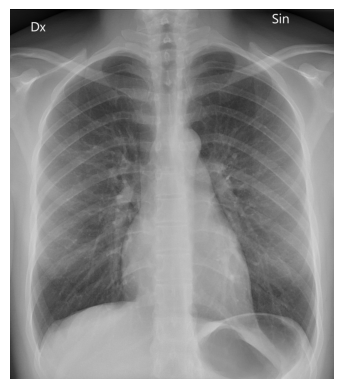

In [3]:
import cv2
from matplotlib import pyplot as plt

image = cv2.imread('chest_x_ray.jpg')

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')  
plt.show()

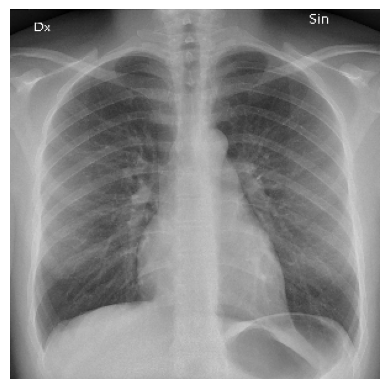

In [4]:
width, height = 300, 300
resized_image = cv2.resize(image, (width, height))

plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

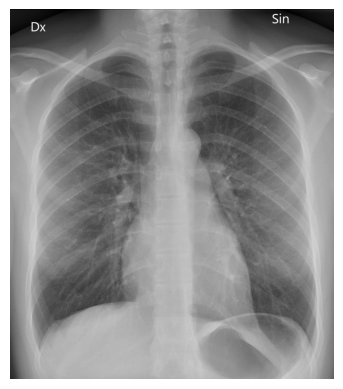

In [5]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

plt.imshow(gray_image, cmap='gray')
plt.axis('off')
plt.show()

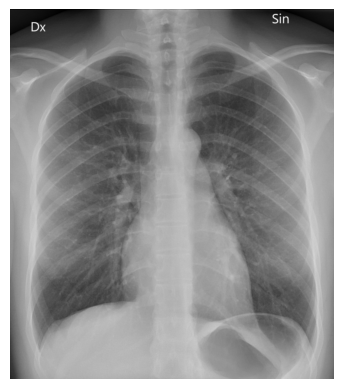

In [6]:
blurred_image = cv2.GaussianBlur(image, (5, 5), 0)

plt.imshow(cv2.cvtColor(blurred_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

`cv2.GaussianBlur(image, (5, 5), 0)` is an OpenCV function that applies a Gaussian blur (or Gaussian smoothing) to an image. This technique is commonly used in image processing to reduce noise and detail, making it particularly useful as a preprocessing step.

1. **`image`**: The input image to which the Gaussian blur will be applied.
2. **`(5, 5)`**: The size of the kernel (in this case, 5x5). This means a 5x5 matrix will be used for the Gaussian kernel, where each element contributes to the blurred pixel based on a Gaussian distribution. A larger kernel size results in a stronger blur.
3. **`0`**: The standard deviation in the x-direction (and y-direction if it's 0). OpenCV automatically calculates the standard deviation based on the kernel size if this parameter is set to 0.

- The Gaussian blur softens the image, which is often useful for noise reduction.
- The `5x5` kernel size determines how much the image is smoothed. Larger values create a stronger blur.


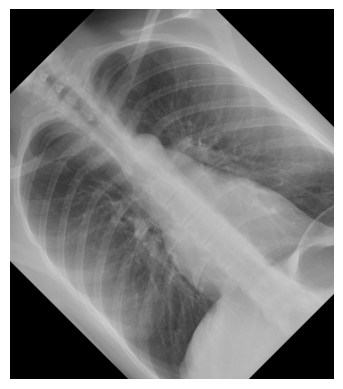

In [7]:
(h, w) = image.shape[:2]
center = (w // 2, h // 2)

matrix = cv2.getRotationMatrix2D(center, 45, 1.0)
rotated_image = cv2.warpAffine(image, matrix, (w, h))

plt.imshow(cv2.cvtColor(rotated_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

This code rotates an image by 45 degrees around its center using OpenCV functions. 

1. **`(h, w) = image.shape[:2]`**: This retrieves the height (`h`) and width (`w`) of the image from its shape. The `[:2]` part extracts only the first two values (height and width), ignoring the number of color channels.

2. **`center = (w // 2, h // 2)`**: This calculates the center point of the image, which will be used as the pivot point for rotation. By dividing the width and height by 2, we get the x and y coordinates of the image's center.

3. **`matrix = cv2.getRotationMatrix2D(center, 45, 1.0)`**: This creates the transformation matrix for rotating the image. The parameters are:
   - `center`: The pivot point around which the rotation occurs (center of the image).
   - `45`: The angle of rotation in degrees (here, 45 degrees clockwise).
   - `1.0`: The scale factor. A value of `1.0` means the image will maintain its original size, while values greater than `1.0` or less than `1.0` will enlarge or shrink the image, respectively.

4. **`rotated_image = cv2.warpAffine(image, matrix, (w, h))`**: This applies the affine transformation (rotation) to the image using `cv2.warpAffine`. The parameters are:
   - `image`: The original image to rotate.
   - `matrix`: The rotation matrix generated by `cv2.getRotationMatrix2D`.
   - `(w, h)`: The size of the output image, which matches the original image’s dimensions in this case.

This rotation process doesn’t alter the original image dimensions. If you need to fit the entire rotated image without cropping, you may need to adjust the output dimensions accordingly.

In [8]:
import numpy as np

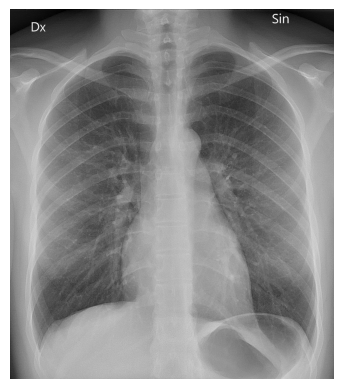

In [9]:
sharpen_kernel = np.array([[-1, -1, -1], 
                           [-1,  9, -1], 
                           [-1, -1, -1]])

sharpened_image = cv2.filter2D(image, -1, sharpen_kernel)

plt.imshow(cv2.cvtColor(sharpened_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

This code snippet sharpens an image using a kernel matrix and OpenCV's `filter2D` function. 

1. **`sharpen_kernel`**: This is a sharpening filter kernel, a 3x3 matrix used to enhance the edges of the image. The values in the matrix dictate how the filter behaves:
   - The center value `9` is high, while the surrounding values `-1` are low. This contrast amplifies edges and fine details by emphasizing differences between neighboring pixels.

   ```
   [[-1, -1, -1],
    [-1,  9, -1],
    [-1, -1, -1]]
   ```

2. **`cv2.filter2D(image, -1, sharpen_kernel)`**: This function applies the sharpening filter to the image. Here:
   - `image` is the input image.
   - `-1` specifies that the output image should have the same depth as the input image.
   - `sharpen_kernel` is the filter kernel that enhances edges and increases sharpness.

3. **Displaying the Result**: The sharpened image is displayed using `matplotlib`. The color conversion from `BGR` to `RGB` ensures the colors appear correctly, as OpenCV reads images in BGR format by default.

This will enhance the edges in the image, making the details look more defined and the image appear sharper.

In [10]:
import cv2
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

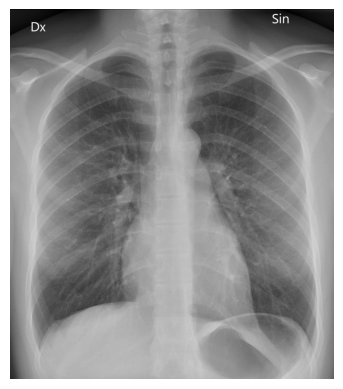

In [11]:
image = cv2.imread('chest_x_ray.jpg')

image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

plt.imshow(image, cmap='gray')
plt.axis('off')
plt.show()

image_resized = cv2.resize(image, (28, 28))

image_resized = image_resized.reshape(1, 28, 28, 1).astype('float32')

image_resized /= 255.0

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D

model = Sequential([
    Conv2D(16, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1))
])

model.summary()

C:\Users\Sarthak\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 16)          │             160 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 160 (640.00 B)

 Trainable params: 160 (640.00 B)

 Non-trainable params: 0 (0.00 B)

In [13]:
features = model.predict(image_resized)

print("Extracted features shape:", features.shape)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step
Extracted features shape: (1, 26, 26, 16)


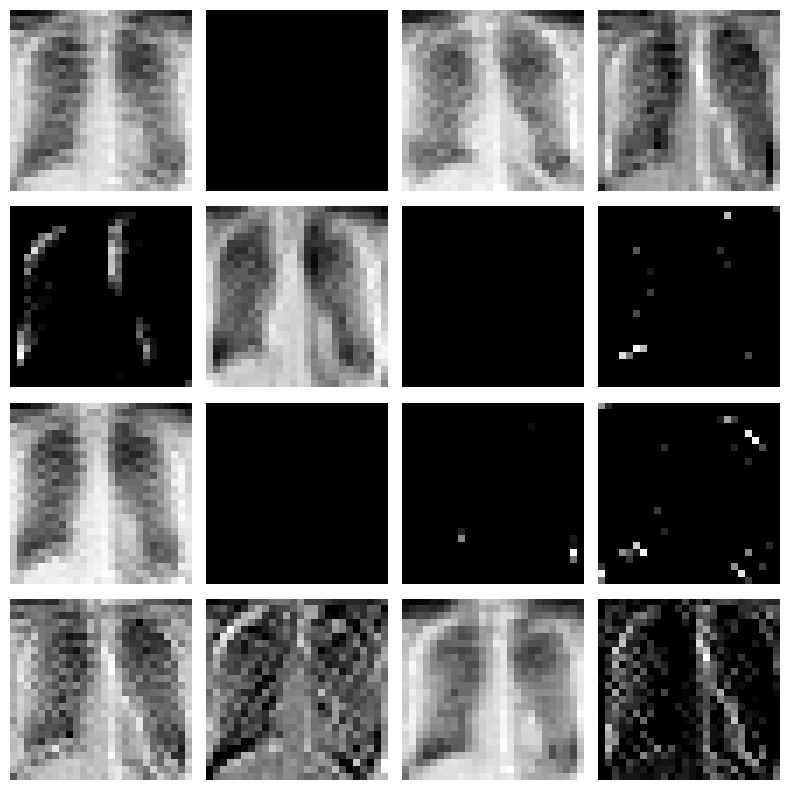

In [14]:
num_filters = features.shape[-1]  
fig, axes = plt.subplots(4, 4, figsize=(8, 8))
axes = axes.ravel()

for i in range(min(num_filters, 16)):  
    axes[i].imshow(features[0, :, :, i], cmap='gray')
    axes[i].axis('off')

plt.tight_layout()
plt.show()

In [15]:
import tensorflow as tf
from tensorflow.keras import layers, models

In [16]:
def VGG16(input_shape=(224, 224, 3), num_classes=1000):
    model = models.Sequential()
    
    # Block 1
    model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu', input_shape=input_shape))
    model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))

    # Block 2
    model.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
    model.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
    model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))

    # Block 3
    model.add(layers.Conv2D(256, (3, 3), padding='same', activation='relu'))
    model.add(layers.Conv2D(256, (3, 3), padding='same', activation='relu'))
    model.add(layers.Conv2D(256, (3, 3), padding='same', activation='relu'))
    model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))

    # Block 4
    model.add(layers.Conv2D(512, (3, 3), padding='same', activation='relu'))
    model.add(layers.Conv2D(512, (3, 3), padding='same', activation='relu'))
    model.add(layers.Conv2D(512, (3, 3), padding='same', activation='relu'))
    model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))

    # Block 5
    model.add(layers.Conv2D(512, (3, 3), padding='same', activation='relu'))
    model.add(layers.Conv2D(512, (3, 3), padding='same', activation='relu'))
    model.add(layers.Conv2D(512, (3, 3), padding='same', activation='relu'))
    model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))
    
    # Flatten the output for fully connected layers
    model.add(layers.Flatten())
    
    # Fully connected layers
    model.add(layers.Dense(4096, activation='relu'))
    model.add(layers.Dense(4096, activation='relu'))
    model.add(layers.Dense(num_classes, activation='softmax'))  # Output layer
    
    return model

In [17]:
# Initialize the model
model = VGG16(input_shape=(224, 224, 3), num_classes=1000)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Display the model summary
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)                    │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 4096)                │     102,764,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4096)                │      16,781,312 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 138,357,544 (527.79 MB)

 Trainable params: 138,357,544 (527.79 MB)

 Non-trainable params: 0 (0.00 B)

# Thanks !!!